# Multiple Linear Regression
-----

## Step 1: <span style="text-decoration:underline">Importing the libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: <span style="text-decoration:underline">Importing the dataset</span>


In [2]:
dataset = pd.read_csv("winequality-red.csv")

In [3]:
dataset.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


>  **note:** We notice that our databases suffer from the problem (that all the data is in one column)...... Let us solve this simple problem at first.

In [4]:
dataset = pd.read_csv("winequality-red.csv", delimiter=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


> Then we continue..........

## Step 3:  <span style="text-decoration:underline">Data analysis</span>

In [5]:
# To analyze descriptive statistics of data
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Based on the data ranges:
#### Wide Range Differences:

- "Free sulfur dioxide" ranges from 1 to 72.
- "Total sulfur dioxide" ranges from 6 to 289.
- Other features like "fixed acidity" (4.6 to 15.9) and "alcohol" (8.4 to 14.9) have smaller ranges.

I am confused whether to apply Feature scaling or not. From my personal opnion , I do not see the differences between the values as very big. They are a bit big, but they are acceptable.

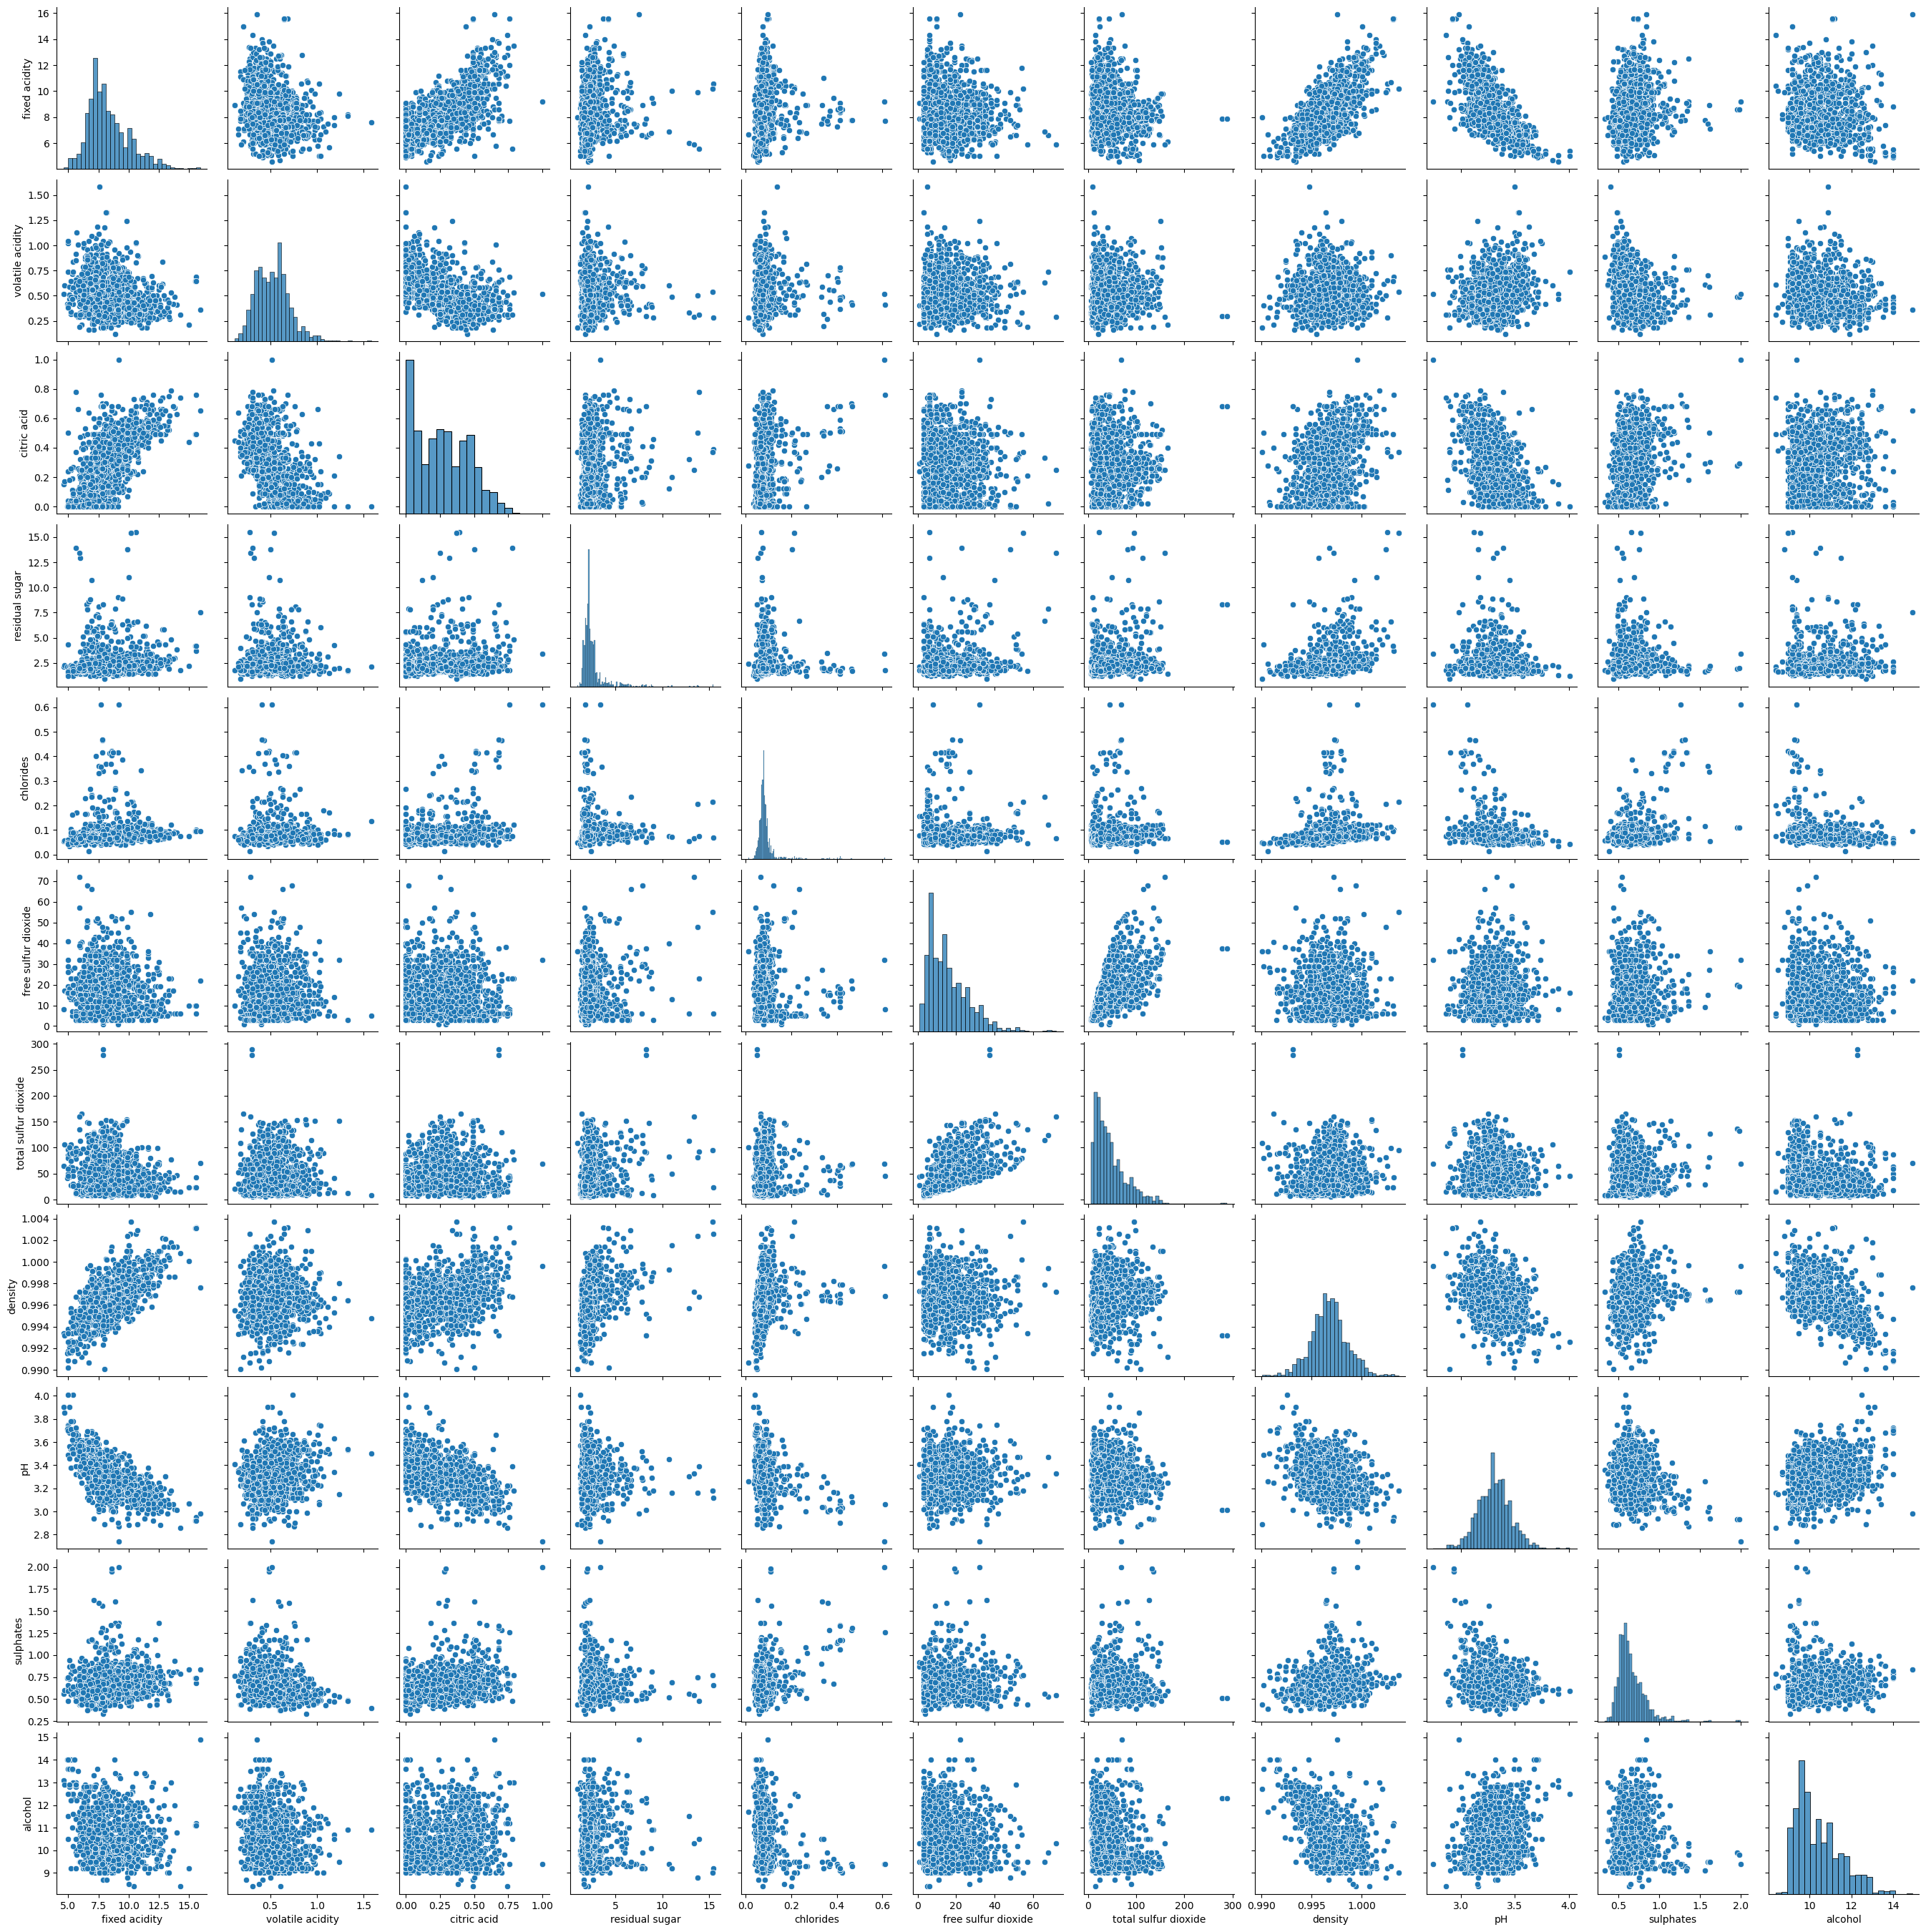

In [8]:
sns.pairplot(dataset.drop(columns=['quality']))
plt.show()

> Well I'm not experienced enough at this stage to read these graphs carefully but I think that since there are points that are connected ..........
the relationships between the variables are pretty good.

## Step 4: <span style="text-decoration:underline">Split the dataset into dependent/independent variables</span>

In [9]:
# independent variables
x = dataset.iloc[:,:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

y = y.reshape(len(y),1)

## Step 5:  <span style="text-decoration:underline">Spliting the dataset into thetraining set and test set</span>

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                   random_state=0)

## Step 6: <span style="text-decoration:underline">Training the Multiple Linear Regression model on training set</span>

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Step 7: <span style="text-decoration:underline">Predicting The Test set results</span>

In [12]:
# Predicting The Test set results
y_pred = regressor.predict(x_test)

## Step 8:  <span style="text-decoration:underline">Visualsing the Training set results</span>

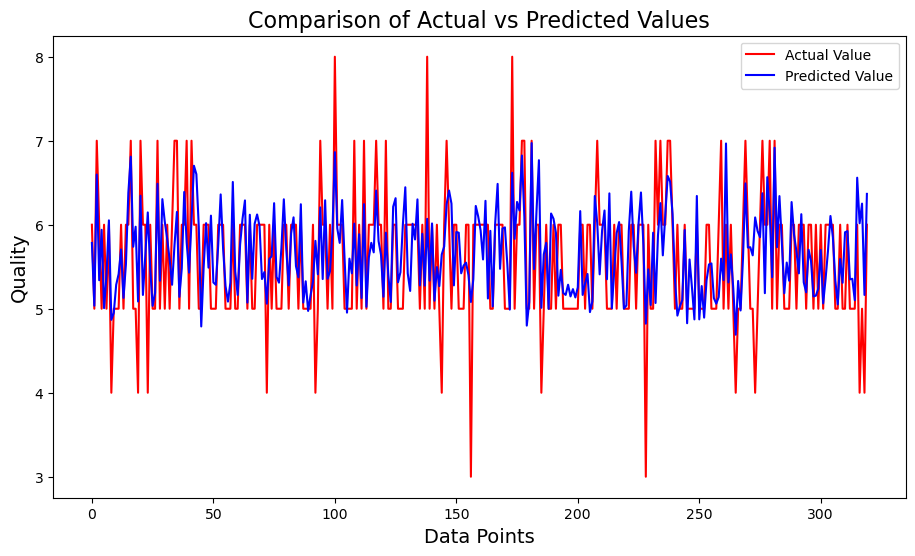

In [13]:
plt.figure(figsize=(11, 6))
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')

plt.title('Comparison of Actual vs Predicted Values', fontsize=16)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Quality', fontsize=14)

plt.legend()
plt.show()

## step 10: <span style="text-decoration:underline">model evaluation</span>

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.38447119782012357
mean_absolute_error :  0.46963309286610977


## step 11: <span style="text-decoration:underline">Calculating R² with Scikit-Learn</span>

In [15]:
from sklearn.metrics import r2_score
R2_sklearn = r2_score(y_test, y_pred)
print(f"R² (Scikit-Learn Calculation): {R2_sklearn}")

R² (Scikit-Learn Calculation): 0.32838876395802363


## Sources:
----
- scikit-learn.org : https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
- archive.ics.uci.edu : https://archive.ics.uci.edu/dataset/186/wine+quality
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20